# Project: Investigate a Dataset (No-Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Over 110 thousand of medical appointments took place in brazil, some patients did not show up for their appointments. the dataset contains 14 features including the present of the patient or not on his appointment date. The features can be classified into 4 groups, patient information (id, gender, age), appointment information (appointment id, appointment date, scheduled date, no show, sms received), health information (hypertension, diabetes, alcoholism, handicap) and social information (Neighborhood, Scholarship). by investigating the dataset, I am trying to answer the following questions:
<b>
<ul>
    <li>Which genders and age groups, patients are most likely not to show up to their appointments?</li>
    <li>Is early scheduling could be a reason for not showing to appointments? How SMS reminder may help?</li>
    <li>At which part of the day patients are most likely to skip their scheduled appointments? Morning, Afternoon, Evening or Night?</li>
    <li>At which day of the week patients are most likely to skip their scheduled appointments?How is that changing over the years and months?</li>
    <li>Is there any correlation between patients positive records in hypertension, diabetes, alcoholism or / and handicap and them not showing up to their appointments?</li>
    <li>Which neighborhood has the most no-show rate? are neighborhoods with more scholarship patients are most likely not to show?</li>
</ul>
    </b>

In [1]:
# importing packages and libraries and matplotlib for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#importing CSV into data frame.
df = pd.read_csv("no_show_appointment.csv")
rows, columns = df.shape
print("The data frame has "+ str(rows) +" rows and " + str(columns) + " columns")

The data frame has 110527 rows and 14 columns


In [3]:
#browse sample of data values and formats of each feature. 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#browse data frame columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#print out statistical details of the numeric data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


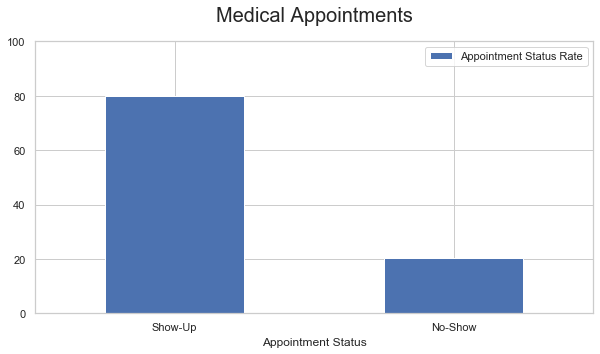

In [6]:
#check number of not showing up patinets to an appointment on scale of 100
#group by no-show column
no_show_percentage = pd.DataFrame(df.groupby(["No-show"])["PatientId"].count())
#calculate percentage of show up and no show and store it in column No-Show
no_show_percentage["No-show"] = no_show_percentage["PatientId"] / sum(no_show_percentage["PatientId"]) * 100
no_show_percentage.drop(columns="PatientId", inplace=True)
#plot the dataframe 
no_show_percentage.plot.bar(figsize=(10,5))
plt.ylim(top=100)
plt.title("Medical Appointments",{'fontsize': 20},pad=20)
plt.xlabel("Appointment Status")
plt.xticks(np.arange(2), ('Show-Up', 'No-Show'), rotation=0)
plt.legend(["Appointment Status Rate"])


In [7]:
#checking the age distripution
df["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [8]:
#Check number of duplicated records in the data frame. 
print("Number of duplicate recrods: " + str(sum(df.duplicated())))

Number of duplicate recrods: 0


In [9]:
#assure gender has only two unique values
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [10]:
#check neighbourhood unique list
df["Neighbourhood"].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [11]:
#check number of wrong values of handcap that exceeds a value of 1
print("Number of wrong handicap values: " + str(df.query("Handcap > 1")["Handcap"].count()))

Number of wrong handicap values: 199


In [12]:
#check scheduled Day and Appointment Day description
df[["ScheduledDay","AppointmentDay"]].describe()

,ScheduledDay,AppointmentDay
count,110527,110527
unique,103549,27
top,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z
freq,24,4692


#### From above, we learn the following:
<ul>
    <li>No-Show appointment rate represented 20% of the data included in the study, and the considered to be reasonable reflection of reality. </li>
    <li>Data does not have any null values or duplicates. </li>
    <li>Age includes some wrong data. some records have '-1' value. </li>
    <li>Handicap has 199 records which has invalid values of (2,3,4), and that does not match column type as Boolean. </li>
</ul>

#### Data requires the below cleaning, transformation and conversions, to help us answering our goal questions:
<ol>
    <li>Fix column names spelling mistakes and apply lowercase letter and underscore word separation.</li>
    <li>Convert scheduled day and appointment day data types from string to datetime.</li>
    <li>Extract appointment time and classify it into 4-day parts (Morning, Afternoon, Evening, Night).</li>
    <li>Calculating how early, by days, the appointment was scheduled.</li>
    <li>Extract appointment year, month and weekday for appointment day.</li>
    <li>Clean and classify age into age groups.</li>
    <li>Correction of handicap invalid values.</li>
    <li>Apply column data types corrections.</li>
    <li>Drop unwanted colmuns for data set.</li>
    <li>Order columns and store data set into new CSV.</li>
</ol>


### Data Cleaning, Transformation and conversions.

<b> Step 1:</b> Fix column names spelling mistakes and apply lowercase letter and underscore word separation

In [13]:
#new column names for columns requires word seperation with underscore or spelling mistakes
columnNames = {
            "PatientId":"patient_id", 
            "AppointmentID":"appointment_id",
            "ScheduledDay":"scheduled_day",
            "AppointmentDay":"appointment_day",
            "Hipertension":"hypertension",
            "Handcap":"handicap",
            "No-show":"no_show"
            }
df = pd.read_csv("no_show_appointment.csv")
#rename columns
df.rename(columns=columnNames, inplace=True)
#lower case all columns names
df.columns = df.columns.str.lower()
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

<b>Step 2:</b> Convert scheduled day and appointment day data types from string to datetime

In [14]:
#converting columns scheduled_day and appointment_day to datetime64
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], format="%Y-%m-%d %H:%M:%S")
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format="%Y-%m-%d %H:%M:%S")
#confirm new data types, as well check no null values was generated because of the transition.
df[["scheduled_day","appointment_day"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB


In [15]:
#look at the description of the date time columns
df[["scheduled_day","appointment_day"]].describe()

,scheduled_day,appointment_day
count,110527,110527
unique,103549,27
top,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00
freq,24,4692
first,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00
last,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00


***Notice*** : all the appointments occurred between 2016-04-29 and 2016-06-08. Hence, the data we are having is only for 2016 and for April, May and June of that year.

<b>Step 3:</b> Extract appointment time and classify it into 4-day parts (Morning, Afternoon, Evening, Night)

In [16]:
df['appointment_day'].dt.time.describe()

count       110527
unique           1
top       00:00:00
freq        110527
Name: appointment_day, dtype: object

***Notice***: the time of the appointment was not registered. There is no way we could no at which part of the day the appointment took place.

<b>Step 4:</b> Calculating how early, by days, the appointment was scheduled

In [17]:
#schedule_days = appointment_day - scheduled_day
df["schedule_days"] = (df["appointment_day"] - df["scheduled_day"]).dt.days

df["schedule_days"].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: schedule_days, dtype: float64

***Notice***: 25%+ of the records the schedule date happened after the appointment. that is a huge number to ignore as it will affect the dataset validity, let us look closer to the problem.

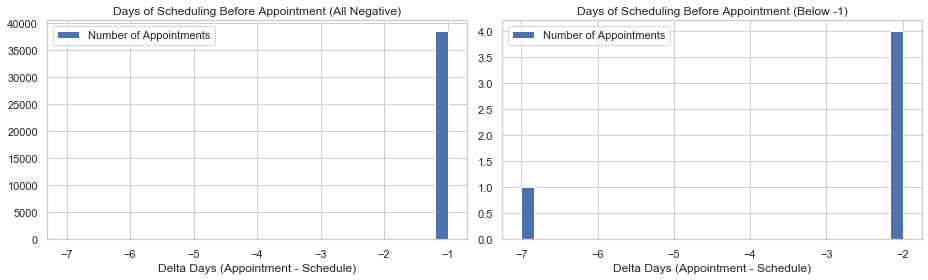

In [18]:
#check ditribuption of the data for schedule_days with negative values
ax1 = plt.subplot(1,2,1)
df.query("schedule_days < 0")["schedule_days"].hist(bins=30,figsize=(13,4))
ax1.set_title("Days of Scheduling Before Appointment (All Negative)")
ax1.set_xlabel("Delta Days (Appointment - Schedule)")
ax1.legend(["Number of Appointments"])
#check ditribuption of the data for schedule_days below that -1
ax2 = plt.subplot(1,2,2)
df.query("schedule_days < -1")["schedule_days"].hist(bins=30, figsize=(13,4))
ax2.set_title("Days of Scheduling Before Appointment (Below -1)")
ax2.set_xlabel("Delta Days (Appointment - Schedule)")
ax2.legend(["Number of Appointments"])
plt.tight_layout()


***Notice***: most of the invalid records states that appointment was schedule 1 day after. and only 5 records was scheduled for 2 and 7 days after. let us look closer into 1-day invalid schedule dates. 

In [19]:
#show the appointment date and schedule dates of appointments was scheulded 1 day after
df.query("schedule_days  == -1")[["schedule_days","scheduled_day", "appointment_day"]].head(10)

,schedule_days,scheduled_day,appointment_day
0,-1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,-1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,-1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,-1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,-1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
8,-1,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00
19,-1,2016-04-29 10:43:14+00:00,2016-04-29 00:00:00+00:00
24,-1,2016-04-29 14:19:19+00:00,2016-04-29 00:00:00+00:00
26,-1,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00
28,-1,2016-04-29 15:48:02+00:00,2016-04-29 00:00:00+00:00


***Notice***: as expected, the issue of time was not registered in the appointment made the conflict. its clearly that those appointment was scheduled in the same day.

let us fix our calculation by taking the difference of the date only without time.

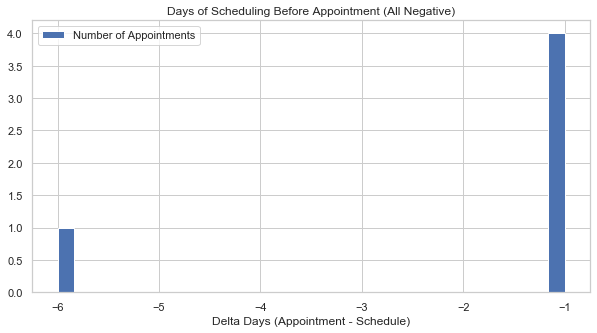

In [20]:
#apply the difference between scheduled day and appointment day with date only without time.
df["schedule_days"] = (df["appointment_day"].dt.date - df["scheduled_day"].dt.date).dt.days
#plot histogram of the negative schedule_days to confirm our results
df.query("schedule_days < 0")["schedule_days"].hist(bins=30,figsize=(10,5))
plt.title("Days of Scheduling Before Appointment (All Negative)")
plt.xlabel("Delta Days (Appointment - Schedule)")
plt.legend(["Number of Appointments"])

***Notice***: now we are having only 5 records of appointments was scheduled after its day. let us drop them.

In [21]:
#filter our appointments which was scheduled after its day.
df = df.query("schedule_days >= 0")
#look at schedule days description
df["schedule_days"].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: schedule_days, dtype: float64

let us group our schedule days into 4 groups based on the description of the data above:
<ul>
    <li>0 Days</li>
    <li>1 to 4 Days</li>
    <li>5 to 15 Days</li>
    <li>Above 16 Days</li>
</ul>

In [22]:
#classifier function that returns the schedule_days group
def schedule_days_classifier(schedule_days):
    if schedule_days == 0:
        return "0 Days"
    elif schedule_days >= 1 and schedule_days < 5:
        return "1-4 Days"
    elif schedule_days >= 5 and schedule_days < 16:
        return "5-15 Days"
    else:
        return "16+ Days"
#apply classifier and store it in schedule_days    
df["schedule_days"] = df["schedule_days"].apply(schedule_days_classifier)

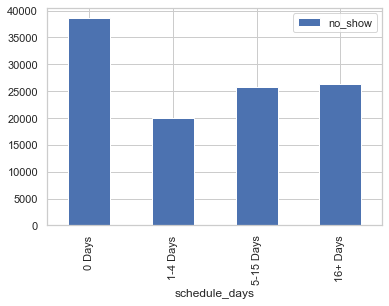

In [23]:
#static order of the schedule_days group
schedule_days_order = ["0 Days", "1-4 Days", "5-15 Days", "16+ Days"]
#group and plot
df.groupby(["schedule_days"]).count()[["no_show"]].loc[schedule_days_order].plot.bar()

***Notice***: alot of patients takes their appointments in the same day.

for now let us drop schedule day column

In [24]:
#drop scheduled_day column
df.drop(columns=["scheduled_day"], inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show', 'schedule_days'],
      dtype='object')

<b>Step 5:</b> Extract appointment year, month and weekday for appointment day.

In [25]:
#print appointment unique years
print("Appointments occured in years of: " + np.array2string(df['appointment_day'].dt.year.unique()))
#print appointment unique months
print("Appointments occured in months of: " + np.array2string(df['appointment_day'].dt.month.unique()))

Appointments occured in years of: [2016]
Appointments occured in months of: [4 5 6]


***Notice***: It is not confirmed that the appointments took place in 2016 only and in April, May and June. I dont think this extraction for those features will be helpful to us. let us concentrate on the weekday.

In [26]:
#list of week_days
week_day_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#week day classifier get day and returns the day name.
def week_day_classifier(day):
    return week_day_list[day];
#apply classifier and store it in week_day
df["week_day"] = df["appointment_day"].dt.weekday.apply(week_day_classifier)
#print out week day sample data
df[[ "appointment_id", "week_day"]].head()

,appointment_id,week_day
0,5642903,Friday
1,5642503,Friday
2,5642549,Friday
3,5642828,Friday
4,5642494,Friday


Let us drop appointment day column

In [27]:
#drop appointment_day column
df.drop(columns=["appointment_day"], inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show', 'schedule_days', 'week_day'],
      dtype='object')

<b> Step 6:</b> Clean and classify age into age groups

let us first query patients with negative age records.

In [28]:
# get patient id for patients has negative age
df.query("age < 0")["patient_id"].astype(str).str[:-2]

99832    465943158731293
Name: patient_id, dtype: object

***Notice***: it is only one record of patients that has negative age with patient ID : 465943158731293. Before we drop out this record, let us try to find if the patient has other records we can get his correct age from.

In [29]:
#find other records for patient id =465943158731293
df.query("patient_id == '465943158731293'")

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_days,week_day
99832,4.659432e+14,5775010,F,-1,ROMÃO,0,0,0,0,0,0,No,0 Days,Monday


the patient has only 1 recod, let us drop it.

In [30]:
#filter our records with negative age.
df = df.query("age >= 0")

In [31]:
#let us see the age distribution
df["age"].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

From the age distribution above, let us classify age into 4 age groups:
<ul>
    <li>[0-18) => Kids</li>
<li>[18-37) => Adults</li>
<li>[37-55) => Matures</li>
<li>[55-115) => Elders</li>
    </ul>

In [32]:
#age classifier function
def age_classifier(age):
    if age >= 0 and age <18:
        return "Kids"
    elif age >= 18 and age < 37:
        return "Adults"
    elif age >= 37 and age < 55:
        return "Matures"
    else:
        return "Elders"
#apply age classifier and store into age_group    
df["age_group"] = df["age"].apply(age_classifier)
#drop age column
df.drop(columns=["age"], inplace=True)
#print out patinet information smaple data
df[["patient_id", "gender", "age_group"]].head()

,patient_id,gender,age_group
0,2.987250e+13,F,Elders
1,5.589978e+14,M,Elders
2,4.262962e+12,F,Elders
3,8.679512e+11,F,Kids
4,8.841186e+12,F,Elders


<b>Step 7:</b> Correction of handicap invalid values. 

As handicap describes is the patient is handicapped or not, then i am going to consider any value 1 or above states the patient is handicapped, and 0 state the patient is not.

In [33]:
#make handicap value above 1 to be equal to 1
df.loc[df.handicap >1 , 'handicap'] =1
df[["handicap"]].describe()

,handicap
count,110521.000000
mean,0.020259
std,0.140884
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<b>Step 8:</b> Apply column data types corrections.

In [34]:
#convert scholarship, hypertension, diabetes, alcoholism, handicap, sms_received to boolean
df["scholarship"] = df["scholarship"].astype(bool)
df["hypertension"] = df["hypertension"].astype(bool)
df["diabetes"] = df["diabetes"].astype(bool)
df["alcoholism"] = df["alcoholism"].astype(bool)
df["handicap"] = df["handicap"].astype(bool)
df["sms_received"] = df["sms_received"].astype(bool)
df[["scholarship","hypertension", "diabetes", "alcoholism", "handicap", "sms_received"]].dtypes

scholarship     bool
hypertension    bool
diabetes        bool
alcoholism      bool
handicap        bool
sms_received    bool
dtype: object

In [35]:
#Convert no_show column from Yes/No into True/False
def noshow_to_boolean(status):
    if status == 'No':
        return False
    else:
        return True
    
df["no_show"] = df["no_show"].apply(noshow_to_boolean)
df[["no_show"]].dtypes

no_show    bool
dtype: object

<b>Step 9:</b> Drop unwanted colmuns for data set.

In [36]:
#dropping patient_id and appointment_id
df.drop(columns=['patient_id', 'appointment_id'], inplace=True)
df.columns

Index(['gender', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show', 'schedule_days',
       'week_day', 'age_group'],
      dtype='object')

<b>Step 10</b> Order columns and store data set into new CSV.

In [37]:
#order data set columns
df = df[['gender', 'age_group', 'neighbourhood','scholarship','hypertension', 'diabetes',
       'alcoholism', 'handicap', 'week_day', 'schedule_days', 'sms_received','no_show']]
#store data frame into cleaned csv
df.to_csv('no_show_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



In [38]:
#load cleaned Data Frame
df_clean = pd.read_csv('no_show_cleaned.csv')

### Which genders and age groups, patients are most likely not to show up to their appointments?

Let us compare Number of Males to Number of Females and then Number of show-up and no-show-up for each gender

In [39]:
#group by gender
gender_all = df_clean.groupby(["gender"])[["gender"]].count()
#Calculate percentage of appointments per gender
gender_all.columns = ["Gender Rate"]
gender_all["Gender Rate"] = gender_all["Gender Rate"] / sum(gender_all["Gender Rate"]) * 100
gender_all.reset_index(inplace=True)

In [40]:
#group by gender and no_show
gender_by_no_show = df_clean.groupby(["gender", "no_show"])[["gender"]].count()
#calculate percentage of appointment per gender per appointment show up status
gender_by_no_show.columns = ["no_show_count"]
gender_by_no_show.reset_index(inplace=True)
gender_by_no_show.columns = ["Gender", "No Show Status", "No Show Count"]
gender_by_no_show =  pd.DataFrame(gender_by_no_show.groupby(["Gender","No Show Status"])["No Show Count"].sum() / gender_by_no_show.groupby(["Gender"])["No Show Count"].sum() * 100)
gender_by_no_show = gender_by_no_show.unstack()

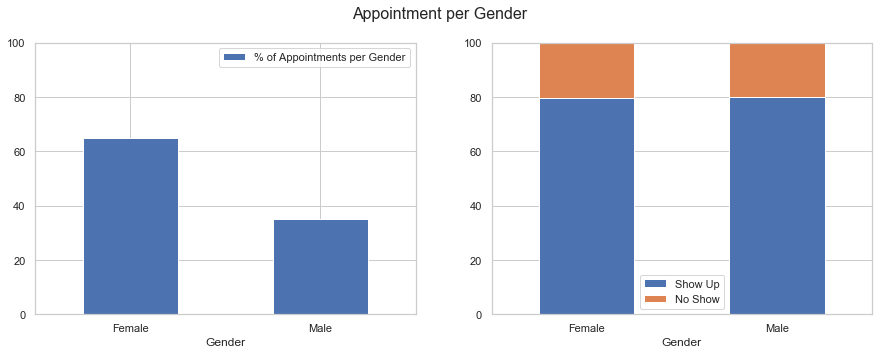

In [41]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Appointment per Gender', fontsize=16)

#plot percentage of appointments per gender
gender_all.plot.bar(ax=axs[0])
axs[0].set_xticklabels(("Female","Male"), rotation=0)
axs[0].set_ylim(top=100)
axs[0].set_xlabel("Gender")
axs[0].legend(["% of Appointments per Gender"])

#plot percentage of appointment per gender per appointment show up status
gender_by_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(("Female","Male"), rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_xlabel("Gender")
axs[1].legend(["Show Up", "No Show"])

***Observation 1***: Appointments of femalre patients are higher than male patients, BUT, the rate of not showing up to the appointments are closely the same.

Now, let us compare number of appointments per age groups.

In [42]:
#group by age group
age_group_all = df_clean.groupby(["age_group"])[["age_group"]].count()
#calculate percentage of appointments per age group 
age_group_all.columns = ["Age Group Rate"]
age_group_all["Age Group Rate"] = age_group_all["Age Group Rate"] / sum(age_group_all["Age Group Rate"]) * 100
age_group_all.reset_index(inplace=True)

In [43]:
#group by age group per appointment show up status
age_group_no_show = df_clean.groupby(["age_group", "no_show"])[["age_group"]].count()
#calculate percentage of appointments per age group per appointment show up status
age_group_no_show.columns = ["age_group_count"]
age_group_no_show.reset_index(inplace=True)
age_group_no_show.columns = ["Age Group", "No Show Status", "No Show Count"]
age_group_no_show = pd.DataFrame(age_group_no_show.groupby(["Age Group","No Show Status"])["No Show Count"].sum() / age_group_no_show.groupby(["Age Group"])["No Show Count"].sum() * 100)
age_group_no_show = age_group_no_show.unstack()

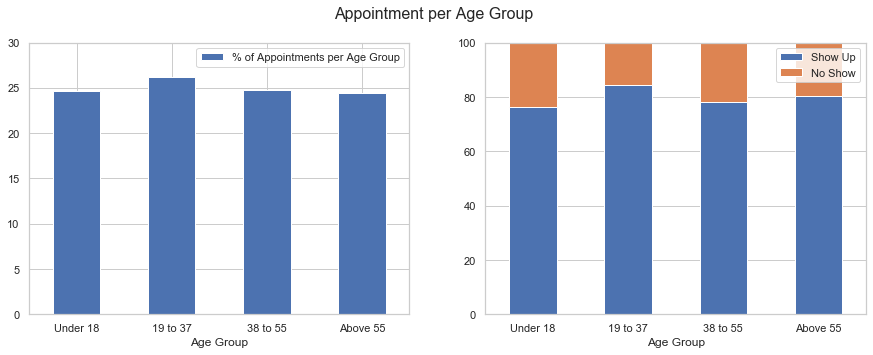

In [44]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Appointment per Age Group', fontsize=16)

#plot percentage of appointments per age group 
age_group_all.plot.bar(ax=axs[0])
axs[0].set_xticklabels(("Under 18","19 to 37", "38 to 55", "Above 55"), rotation=0)
axs[0].set_ylim(top=30)
axs[0].set_xlabel("Age Group")
axs[0].legend(["% of Appointments per Age Group"])
#plot percentage of appointments per age group per appointment show up status
age_group_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(("Under 18","19 to 37", "38 to 55", "Above 55"), rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_xlabel("Age Group")
axs[1].legend(["Show Up", "No Show"])

***Observation 2***: Ages between 19 to 37 has greatest number of appointments, as well it has the lowest rate of not showing up to their appointments. All age groups has a change of not showing up to their appointments within range of 15 to 25%.

### Is early scheduling could be a reason for not showing to appointments? How SMS reminder may help?

Let us compare Number of appointments per groups of early scheduling days 

In [45]:
#group by schedule days group
schedule_days_all = df_clean.groupby(["schedule_days"])[["schedule_days"]].count().loc[schedule_days_order]
#calculate percentage of appointments per schedule day groups
schedule_days_all.columns = ["Schedule Days Rate"]
schedule_days_all["Schedule Days Rate"] = schedule_days_all["Schedule Days Rate"] / sum(schedule_days_all["Schedule Days Rate"]) * 100
schedule_days_all.reset_index(inplace=True)

In [46]:
#group by schedule days group and appointment show up status
schedule_days_no_show = df_clean.groupby(["schedule_days", "no_show"])[["schedule_days"]].count()
#calcualte percentage of appointments per schedule day group per appointment show up status
schedule_days_no_show.columns = ["schedule_days_count"]
schedule_days_no_show.reset_index(inplace=True)
schedule_days_no_show.columns = ["Schedule Days", "No Show Status", "No Show Count"]
schedule_days_no_show = pd.DataFrame(schedule_days_no_show.groupby(["Schedule Days","No Show Status"])["No Show Count"].sum() / schedule_days_no_show.groupby(["Schedule Days"])["No Show Count"].sum() * 100)
schedule_days_no_show = schedule_days_no_show.unstack().loc[schedule_days_order]

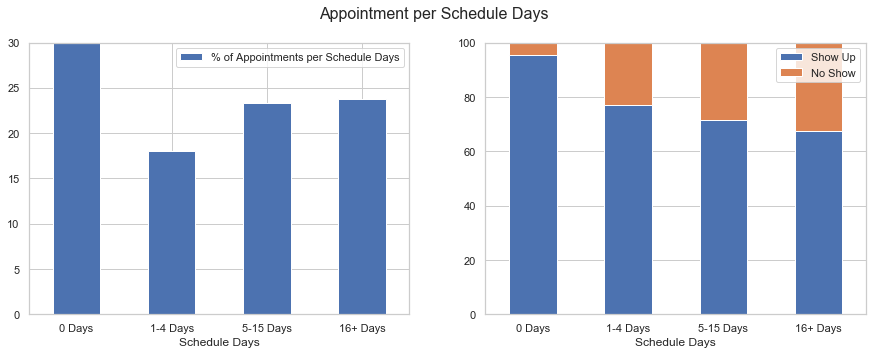

In [47]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Appointment per Schedule Days', fontsize=16)

#plot percentage of appointments per schedule day groups
schedule_days_all.plot.bar(ax=axs[0])
axs[0].set_xticklabels(schedule_days_order, rotation=0)
axs[0].set_ylim(top=30)
axs[0].set_xlabel("Schedule Days")
axs[0].legend(["% of Appointments per Schedule Days"])

#plot percentage of appointments per schedule day group per appointment show up status
schedule_days_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(schedule_days_order, rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_xlabel("Schedule Days")
axs[1].legend(["Show Up", "No Show"])

***Observation 3***: most of the patients schedule their appointments in the same day, and those patients are most likely to show up in a percentage around 95%. as early as the patient schedule their appointments are most likely not going to show up to their appointments.

Now let us look how SMS reminders to the patients might affect the appointment show up status rate.

In [48]:
#get only show up appointments and group by schedule days per sms_received per appointment show up status
schedule_days_sms_showed_up = df_clean.query("no_show == False").groupby(["schedule_days", "sms_received", "no_show"])[["schedule_days"]].count()
#calcualte the percentage of scheudle days per sms received per appointment show up status
schedule_days_sms_showed_up.columns = ["schedule_days_count"]
schedule_days_sms_showed_up.reset_index(inplace=True)
schedule_days_sms_showed_up.columns = ["Schedule Days","SMS Recieved", "No Show Status", "No Show Count"]
schedule_days_sms_showed_up = pd.DataFrame(schedule_days_sms_showed_up.groupby(["Schedule Days","SMS Recieved","No Show Status"])["No Show Count"].sum() / schedule_days_sms_showed_up.groupby(["Schedule Days"])["No Show Count"].sum() * 100)
#unstack twice the data
schedule_days_sms_showed_up = schedule_days_sms_showed_up.unstack().unstack().loc[schedule_days_order]

In [49]:
#get only no-show appointments and group by schedule days per sms_received per appointment show up status
schedule_days_sms_no_show = df_clean.query("no_show == True").groupby(["schedule_days", "sms_received", "no_show"])[["schedule_days"]].count()
#calcualte the percentage of scheudle days per sms received per appointment show up status
schedule_days_sms_no_show.columns = ["schedule_days_count"]
schedule_days_sms_no_show.reset_index(inplace=True)
schedule_days_sms_no_show.columns = ["Schedule Days","SMS Recieved", "No Show Status", "No Show Count"]
schedule_days_sms_no_show = pd.DataFrame(schedule_days_sms_no_show.groupby(["Schedule Days","SMS Recieved","No Show Status"])["No Show Count"].sum() / schedule_days_sms_no_show.groupby(["Schedule Days"])["No Show Count"].sum() * 100)
#unstack twice the data
schedule_days_sms_no_show = schedule_days_sms_no_show.unstack().unstack().loc[schedule_days_order]

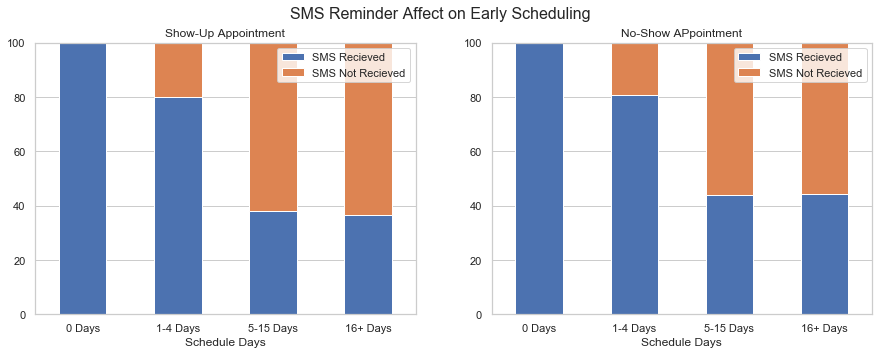

In [50]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('SMS Reminder Affect on Early Scheduling', fontsize=16)

schedule_days_sms_showed_up.plot.bar(ax=axs[0],stacked=True);
axs[0].set_xticklabels(schedule_days_order, rotation=0)
axs[0].set_ylim(top=100)
axs[0].set_title("Show-Up Appointment")
axs[0].set_xlabel("Schedule Days")
axs[0].legend(["SMS Recieved", "SMS Not Recieved"])

schedule_days_sms_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(schedule_days_order, rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_title("No-Show APpointment")
axs[1].set_xlabel("Schedule Days")
axs[1].legend(["SMS Recieved", "SMS Not Recieved"])

***Observation 4***: SMS reminders has small affect on the appointments was scheduled before 5+ days in an amount of 10%.

### At which part of the day patients are most likely to skip their scheduled appointments? Morning, Afternoon, Evening or Night?

As the appointment time was not recorded, this question will be skipped. 

### At which day of the week patients are most likely to skip their scheduled appointments?How is that changing over the years and months?

Let us compare Number of appointments per weekdays

In [51]:
#group by week days
weekday_all = df_clean.groupby(["week_day"])[["week_day"]].count()
#calculate percentage of appointment per week day
weekday_all.columns = ["Week Day Rate"]
weekday_all["Week Day Rate"] = weekday_all["Week Day Rate"] / sum(weekday_all["Week Day Rate"]) * 100
#order index column by weekday order
weekday_all = weekday_all.reindex(week_day_list)

In [52]:
#group by week days per appointment show up status
week_day_no_show = df_clean.groupby(["week_day", "no_show"])[["week_day"]].count()
#calculate percentage of appointment per week day per appointment show up status
week_day_no_show.columns = ["week_day_count"]
week_day_no_show.reset_index(inplace=True)
week_day_no_show.columns = ["Week Day", "No Show Status", "No Show Count"]
week_day_no_show = pd.DataFrame(week_day_no_show.groupby(["Week Day","No Show Status"])["No Show Count"].sum() / week_day_no_show.groupby(["Week Day"])["No Show Count"].sum() * 100)
week_day_no_show = week_day_no_show.unstack()
#order index by weekday order
week_day_no_show = week_day_no_show.reindex(week_day_list)

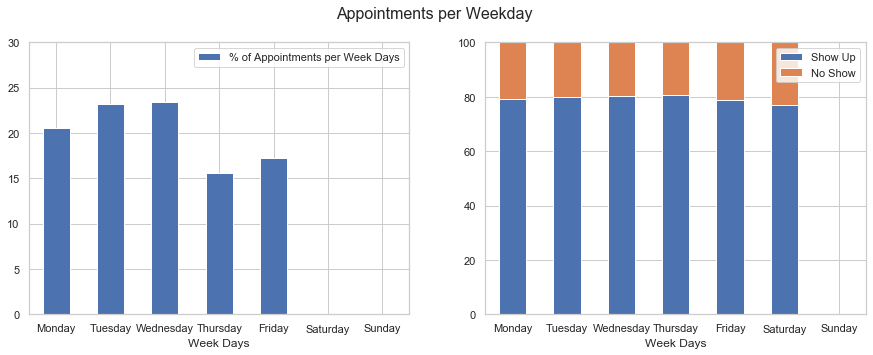

In [53]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Appointments per Weekday', fontsize=16)

#plot of percentage of appointment per week day
weekday_all.plot.bar(ax=axs[0],stacked=True);
axs[0].set_xticklabels(week_day_list, rotation=0)
axs[0].set_ylim(top=30)
axs[0].set_xlabel("Week Days")
axs[0].legend(["% of Appointments per Week Days"])

#plot of percentage of appointment per week day per appointment show up status
week_day_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(week_day_list, rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_xlabel("Week Days")
axs[1].legend(["Show Up", "No Show"])

***Observation 5***: Patients scheudle their appointments to be on the weekdays not in the weekends. And all of the weekdays has almost equal rate of patients no-show to their appointments. 

We are unable to study the changing of no-show rate over the months and the years, as the data is only representing short interval of time. 

### Is there any correlation between patients positive records in hypertension, diabetes, alcoholism or / and handicap and them not showing up to their appointments?

let us compare each health feature with rate of appointment show up status.

In [54]:
#group by hypertenstion per appointment show up status
hipertension_no_show = df_clean.groupby(["hypertension", "no_show"])[["no_show"]].count()
#calculate the percentage appointments of hypertentation  per appointment show up status
hipertension_no_show.columns = ["hypertension_count"]
hipertension_no_show.reset_index(inplace=True)
hipertension_no_show.columns = ["Hypertension", "No Show Status", "No Show Count"]
hipertension_no_show = pd.DataFrame(hipertension_no_show.groupby(["Hypertension","No Show Status"])["No Show Count"].sum() / hipertension_no_show.groupby(["Hypertension"])["No Show Count"].sum() * 100)
hipertension_no_show = hipertension_no_show.unstack()

In [55]:
#group by diabetes per appointment show up status
diabetes_no_show = df_clean.groupby(["diabetes", "no_show"])[["no_show"]].count()
#calculate the percentage appointments of diabetes per appointment show up status
diabetes_no_show.columns = ["diabetes_count"]
diabetes_no_show.reset_index(inplace=True)
diabetes_no_show.columns = ["Diabetes", "No Show Status", "No Show Count"]
diabetes_no_show = pd.DataFrame(diabetes_no_show.groupby(["Diabetes","No Show Status"])["No Show Count"].sum() / diabetes_no_show.groupby(["Diabetes"])["No Show Count"].sum() * 100)
diabetes_no_show = diabetes_no_show.unstack()

In [56]:
#group by diabetes per appointment show up status
alcoholism_no_show = df_clean.groupby(["alcoholism", "no_show"])[["no_show"]].count()
#calculate the percentage appointments of alcoholism per appointment show up status
alcoholism_no_show.columns = ["alcoholism_count"]
alcoholism_no_show.reset_index(inplace=True)
alcoholism_no_show.columns = ["Alcoholism", "No Show Status", "No Show Count"]
alcoholism_no_show = pd.DataFrame(alcoholism_no_show.groupby(["Alcoholism","No Show Status"])["No Show Count"].sum() / alcoholism_no_show.groupby(["Alcoholism"])["No Show Count"].sum() * 100)
alcoholism_no_show = alcoholism_no_show.unstack()

In [57]:
#group by handicap per appointment show up status
handcap_no_show = df_clean.groupby(["handicap", "no_show"])[["no_show"]].count()
#calculate the percentage appointments of handicap per appointment show up status
handcap_no_show.columns = ["handicap_count"]
handcap_no_show.reset_index(inplace=True)
handcap_no_show.columns = ["Handicap", "No Show Status", "No Show Count"]
handcap_no_show = pd.DataFrame(handcap_no_show.groupby(["Handicap","No Show Status"])["No Show Count"].sum() / handcap_no_show.groupby(["Handicap"])["No Show Count"].sum() * 100)
handcap_no_show = handcap_no_show.unstack()

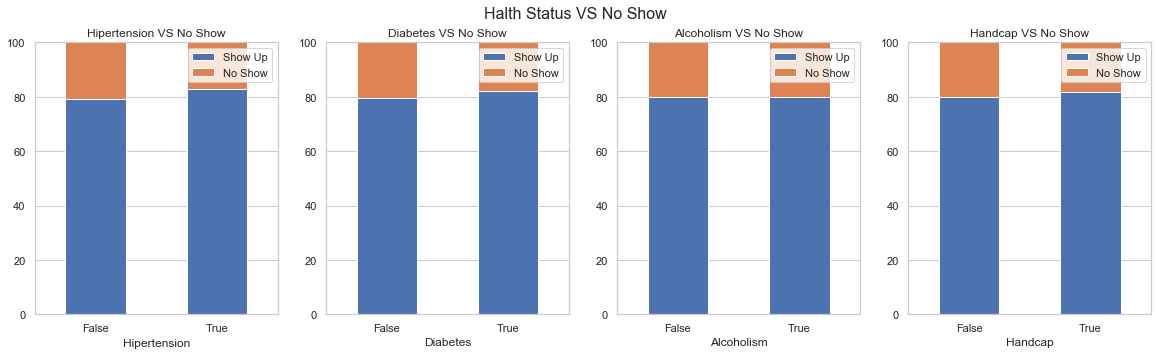

In [58]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Halth Status VS No Show', fontsize=16)
#plot hypertenstion per appointment show up status
hipertension_no_show.plot.bar(ax=axs[0],stacked=True);
axs[0].set_xticklabels(("False", "True"),rotation=0)
axs[0].set_ylim(top=100)
axs[0].set_title("Hipertension VS No Show")
axs[0].set_xlabel("Hipertension")
axs[0].legend(["Show Up", "No Show"])

#plot diabetes per appointment show up status
diabetes_no_show.plot.bar(ax=axs[1], stacked=True)
axs[1].set_xticklabels(("False", "True"),rotation=0)
axs[1].set_ylim(top=100)
axs[1].set_title("Diabetes VS No Show")
axs[1].set_xlabel("Diabetes")
axs[1].legend(["Show Up", "No Show"])

#plot alcoholism per appointment show up status
alcoholism_no_show.plot.bar(ax=axs[2],stacked=True);
axs[2].set_xticklabels(("False", "True"),rotation=0)
axs[2].set_ylim(top=100)
axs[2].set_title("Alcoholism VS No Show")
axs[2].set_xlabel("Alcoholism")
axs[2].legend(["Show Up", "No Show"])

#plot handicaped per appointment show up status
handcap_no_show.plot.bar(ax=axs[3], stacked=True)
axs[3].set_xticklabels(("False", "True"), rotation=0)
axs[3].set_ylim(top=100)
axs[3].set_title("Handcap VS No Show")
axs[3].set_xlabel("Handcap")
axs[3].legend(["Show Up", "No Show"])



***Observation 6***: from above, all health statuses show no affect on the patient not showing to their appointments or not.

### Which neighborhood has the most no-show rate? are neighborhoods with more scholarship patients are most likely not to show?

let us compare number of appointments per neighborhoods.

In [59]:
#group by neighbourhood per appointment show up status.
neighbourhood_all = df_clean.groupby(["neighbourhood", "no_show"])[["no_show"]].count()
neighbourhood_all.columns = ["no_show_count"]
neighbourhood_all.reset_index(inplace=True)
#Calculate percentage appointments per neighborhood per appointment show up status
neighbourhood_all["no_show_rate"] = pd.DataFrame(neighbourhood_all.groupby(["neighbourhood","no_show"])["no_show_count"].sum() / neighbourhood_all.groupby(["neighbourhood"])["no_show_count"].sum() * 100).reset_index()[["no_show_count"]]
neighbourhood_all = neighbourhood_all.groupby(["neighbourhood","no_show"])[["no_show_count", "no_show_rate"]].sum()
neighbourhood_all = neighbourhood_all.unstack()
#for neighbours has all patients showed up or all patients not showed to their appointment, substitute by 0
neighbourhood_all = neighbourhood_all.fillna(0)

Text(0.5, 1.0, 'Appointment Per All Neigbourhoods')

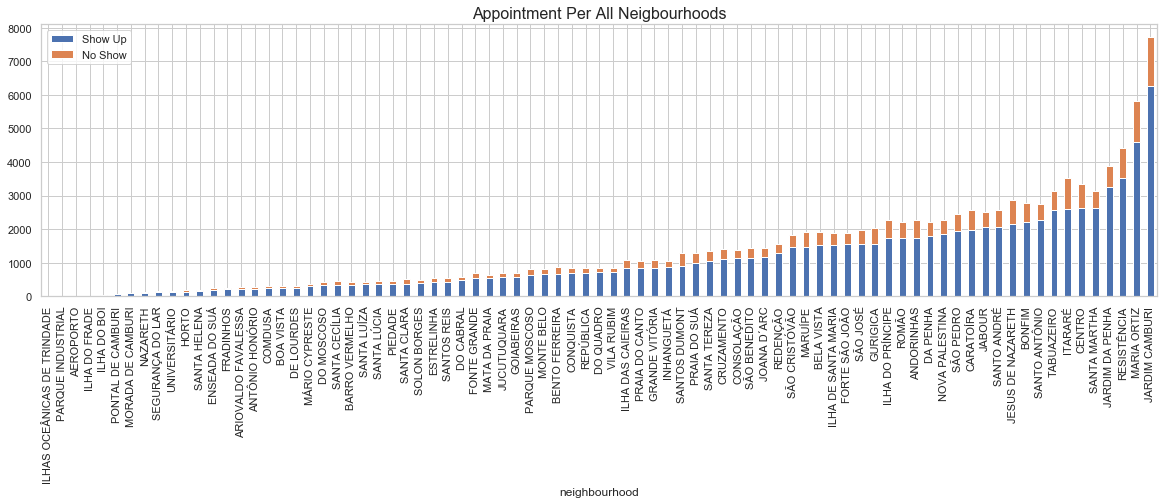

In [60]:
#plot hypertenstion per appointment show up status
axs = neighbourhood_all["no_show_count"].sort_values(by=False).plot.bar(stacked=True, figsize=(20,5));
axs.set_xlabel("neighbourhood")
axs.legend(["Show Up", "No Show"])
axs.set_title("Appointment Per All Neigbourhoods", fontsize=16)


let us execlude neighbourhoods which has less than 1000 appointments. The reason behind this execluding is that they dont have enough appointments to study their no show rate. As well, those neighbourhoods cannot be classified based on their patients scholarships as we are going to see in the following steps.

In [61]:
#excluding all neigbourhoods which has less than 1000 appointments
neighbourhood_above_1000_visits = neighbourhood_all[neighbourhood_all["no_show_count"][False] + neighbourhood_all["no_show_count"][True] > 1000]

Text(0.5, 1.0, 'Appointment Per Neigbourhoods (1000+ Appointments)')

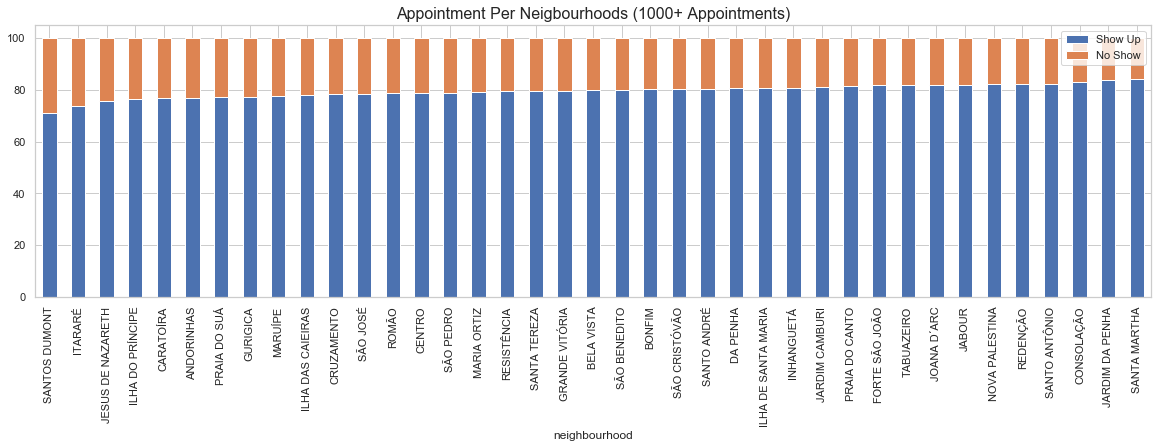

In [62]:
# plot percentage of appointments per neighbourhood per appointment show up status.
axs = neighbourhood_above_1000_visits["no_show_rate"].sort_values(by=False).plot.bar(stacked=True, figsize=(20,5));
axs.set_xlabel("neighbourhood")
axs.legend(["Show Up", "No Show"])
axs.set_title("Appointment Per Neigbourhoods (1000+ Appointments)", fontsize=16)

***Observation 7***: all neigbourshood has no-show up appointments are around the 20%.

Let us find out the affect of the scholarships on the neighbourhoods. to do this, i am going to classify the neighbourhoods into social classes based on the rate of the patients has medical scholarships.

In [63]:
#group by negibourhoods per scholarships, for only neigbourhoods has more than 1000 appointments. 
neighbourhood_scholarship = df_clean.query(f"neighbourhood in {neighbourhood_above_1000_visits.index.tolist()}").groupby(["neighbourhood", "scholarship"])[["scholarship"]].count()
neighbourhood_scholarship.columns = ["scholarship_count"]
neighbourhood_scholarship.reset_index(inplace=True)
#caclualte scholraship rate per neighbourhoods
neighbourhood_scholarship["scholarship_rate"] = pd.DataFrame(neighbourhood_scholarship.groupby(["neighbourhood","scholarship"])["scholarship_count"].sum() / neighbourhood_scholarship.groupby(["neighbourhood"])["scholarship_count"].sum() * 100).reset_index()[["scholarship_count"]]
neighbourhood_scholarship = neighbourhood_scholarship.groupby(["neighbourhood", "scholarship"])[["scholarship_rate"]].sum()
neighbourhood_scholarship.reset_index(inplace=True)
#find neigbourhood scholarships distribution
neighbourhood_scholarship.query("scholarship == True").describe()

,scholarship_rate
count,38.000000
mean,11.811411
std,6.104676
min,0.283725
25%,8.913911
50%,11.761120
75%,14.424395
max,28.075052


In [64]:
#function to classify negbourhood by the scholraship rate.
def neighbourhood_social_classifier(row):
    x = row["scholarship_rate"]
    if(row["scholarship"] == False):
        x = 100 - x
       
    if x >= 0.283725 and x < 8.913911:
        return "Class A"
    elif x >= 8.913911 and x < 11.761120:
        return "Class B"
    elif x >= 11.761120 and x < 14.424395:
        return "Class C"
    else:
        return "Class D"
    
#apply classigication of neighbourhoods
neighbourhood_scholarship["neighbourhood_class"] = neighbourhood_scholarship.apply(neighbourhood_social_classifier,axis=1)
neighbourhood_scholarship_class = neighbourhood_scholarship.loc[:,["neighbourhood", "neighbourhood_class"]]
#drop dublicate records
neighbourhood_scholarship_class.drop_duplicates(inplace=True)


In <i>neighbourhood_scholarship_class</i>, it contains neighbourhood scholarship dictionary table.

In [65]:
#function to get neigbourhood class
def get_neighbourhood_class(value):
    return neighbourhood_scholarship_class.query(f"neighbourhood == '{value}'")["neighbourhood_class"].values[0]

neighbourhood_above_1000_visits_classed = neighbourhood_above_1000_visits.reset_index()
#Apply classification of neighbourhood
neighbourhood_above_1000_visits_classed["neighbourhood_class"] = neighbourhood_above_1000_visits_classed["neighbourhood"].apply(get_neighbourhood_class)
#group by neigbourhood class
neighbourhood_above_1000_visits_classed.drop(columns=['neighbourhood'], inplace=True, level=0)
neighbourhood_above_1000_visits_classed = neighbourhood_above_1000_visits_classed.groupby(["neighbourhood_class"]).sum().stack()
neighbourhood_above_1000_visits_classed = neighbourhood_above_1000_visits_classed[["no_show_count"]]
#caclulate percentage of appointments per neigbourhood class
neighbourhood_above_1000_visits_classed["no_show_rate"] = pd.DataFrame(neighbourhood_above_1000_visits_classed["no_show_count"] / neighbourhood_above_1000_visits_classed.groupby(["neighbourhood_class"])["no_show_count"].sum() * 100)[["no_show_count"]].values
neighbourhood_above_1000_visits_classed = neighbourhood_above_1000_visits_classed.unstack()

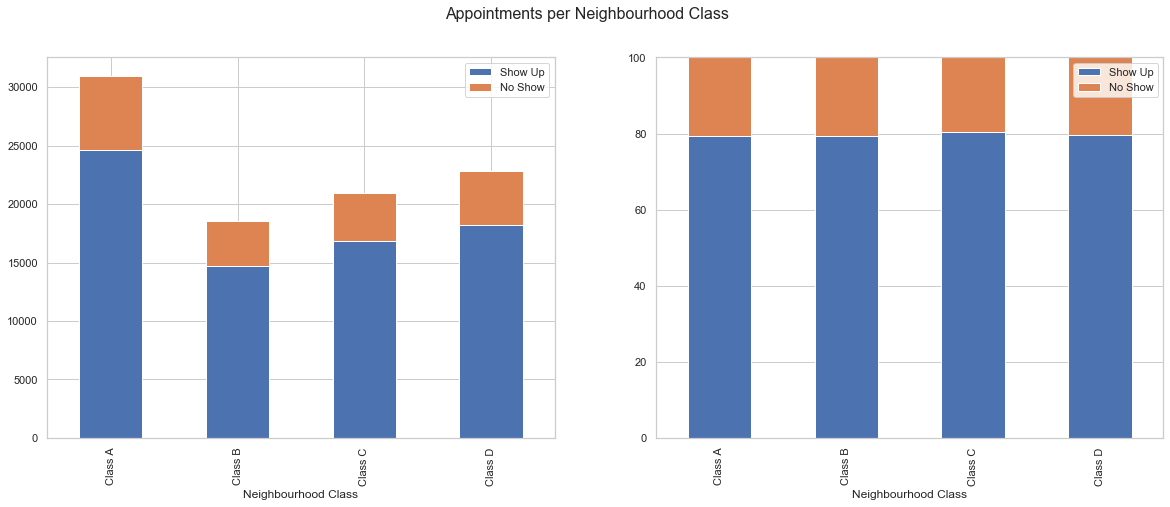

In [66]:
fig, axs = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Appointments per Neighbourhood Class', fontsize=16)

#plot neighbourhood class per appointment show up status.
neighbourhood_above_1000_visits_classed["no_show_count"].plot.bar(ax=axs[0],stacked=True);
axs[0].set_xlabel("Neighbourhood Class")
axs[0].legend(["Show Up", "No Show"])
# plot percentage of appointments class per neighbourhood per appointment show up status.
neighbourhood_above_1000_visits_classed["no_show_rate"].plot.bar(ax=axs[1],stacked=True);
axs[1].set_ylim(top=100)
axs[1].set_xlabel("Neighbourhood Class")
axs[1].legend(["Show Up", "No Show"])

***Observation 8***: Neighbourhoods of class A, has least patients with scholarships, has the most medical appointments. But appointments show-up rate are equals for neighbourhoods classes.

<a id='conclusions'></a>
## Conclusions

From the observations above, I can state the main cause of patients not showing up to their appointments is early scheduling. In observation 3, it shows that as early as the scheduling happened, the patients are most likely not going to show up to their appointment. That is reasonable cause for many reasons. The patients might forget, or gets busy with other things on the date of the appointment. Also, from observation 4, it shows how sms reminder make a small changes on the no-show rate.

Appointment time was not registered in the data, and that could be a very useful infomration to know which part of the day the patients are most likely to skip their appointments. As well, I wanted to have longer interval of time than 3 months. Longer period of time will give us an indication on how seasons and holidays may affect the appointment show-up status.

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0